In [ ]:
# importing required libraries
import numpy as np
import pandas as pd



import numpy as np
import pandas as pd



  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=36eb37711f0f71e1477a879ee93df7f26d59d40e6a1cfbc7d15d9d6649ee295b
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
# saving and loading trained model
import pickle
from os import path


In [ ]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [ ]:
# importing library for plotting
import matplotlib.pyplot as plt

In [ ]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [ ]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

In [ ]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [100]:
data = pd.read_csv('/content/KDDTest+.txt',header=None, names=col_names)

In [101]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [102]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(22544, 42)

In [103]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
# number of attack labels
data['label'].value_counts()

,count
label,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


In [105]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [106]:
# calling change_label() function
change_label(data)

<ipython-input-105-38fbacafca28>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


In [107]:
# distribution of attack classes
data.label.value_counts()

,count
label,
normal,9711
Dos,7460
R2L,2885
Probe,2421
U2R,67


In [108]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()

def normalization(df, col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr), 1))
  return df


In [109]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,Probe


In [110]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)


In [111]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,Dos
1,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,Dos
2,-0.154113,tcp,ftp_data,SF,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,normal
3,-0.155534,icmp,eco_i,SF,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,Probe
4,-0.154823,tcp,telnet,RSTO,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,Probe


In [112]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [113]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [114]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [115]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [116]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [117]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [118]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,abnormal,0
1,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,abnormal,0
2,-0.154113,tcp,ftp_data,SF,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,normal,1
3,-0.155534,icmp,eco_i,SF,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,abnormal,0
4,-0.154823,tcp,telnet,RSTO,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,abnormal,0


In [119]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="")
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0,True,False,abnormal
1,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0,True,False,abnormal
2,-0.154113,tcp,ftp_data,SF,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,False,True,normal
3,-0.155534,icmp,eco_i,SF,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,True,False,abnormal
4,-0.154823,tcp,telnet,RSTO,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,0,True,False,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,tcp,smtp,SF,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,False,True,normal
22540,-0.155534,tcp,http,SF,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,False,True,normal
22541,-0.155534,tcp,http,SF,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,...,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861,0,True,False,abnormal
22542,-0.155534,udp,domain_u,SF,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483,1,False,True,normal


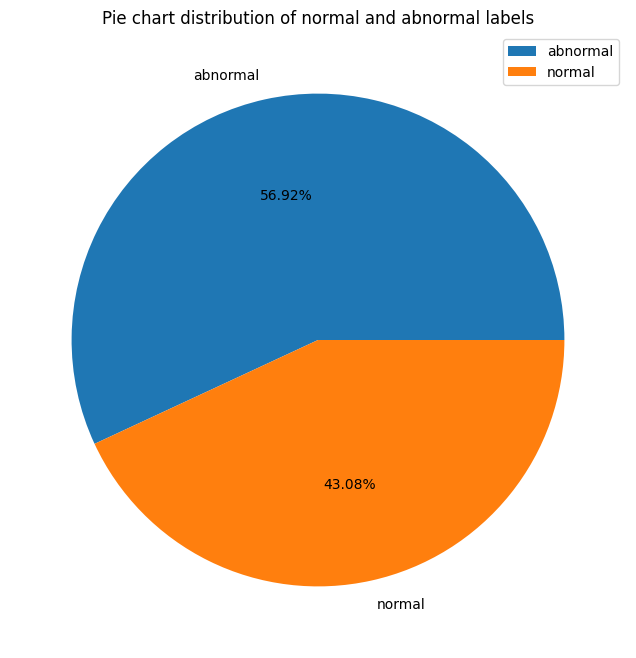

In [120]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [121]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

<ipython-input-121-1e82c1581057>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = bin_data['intrusion']


In [122]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

,intrusion
same_srv_rate,0.510634
logged_in,0.551159
dst_host_same_srv_rate,0.575526
dst_host_srv_count,0.593344
intrusion,1.000000


In [123]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [124]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [125]:
# saving final dataset to disk
bin_data.to_csv("bin_data.csv")
# final dataset for binary classification
bin_data

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,1.166764,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,-1.305370,-1.169697,-1.697859,False,...,False,False,False,False,False,False,0,True,False,abnormal
1,0.443234,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,-1.397181,-1.250212,-1.770589,False,...,False,False,False,False,False,False,0,True,False,abnormal
2,-0.607053,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.002934,-0.489800,0.629488,False,...,False,False,False,False,True,False,1,False,True,normal
3,-0.607053,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.898090,-0.749234,0.629488,True,...,False,False,False,False,True,False,0,True,False,abnormal
4,-0.607053,0.054856,-0.348468,-0.358118,-0.35275,-0.890373,-0.685647,-0.489800,0.629488,False,...,False,False,False,False,False,False,0,True,False,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.607053,-0.347390,-0.348468,-0.321505,-0.35275,1.123125,0.255414,0.002232,0.629488,False,...,False,False,False,False,True,False,1,False,True,normal
22540,-0.599273,-0.347390,-0.348468,-0.321505,-0.35275,1.123125,0.898090,1.022079,0.629488,False,...,False,False,False,False,True,False,1,False,True,normal
22541,-0.575933,-0.347390,-0.348468,-0.358118,-0.35275,1.123125,0.898090,1.022079,0.629488,False,...,False,False,False,False,True,False,0,True,False,abnormal
22542,-0.583713,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.875137,0.995240,0.629488,False,...,False,False,False,False,True,False,1,False,True,normal


In [126]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [127]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [128]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
# summary of model layers
mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 50)                  │           4,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,651 (18.17 KB)

 Trainable params: 4,651 (18.17 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


In [132]:
from sklearn.preprocessing import LabelEncoder

# Convert DataFrame to avoid modifying original data
bin_data_encoded = bin_data.copy()

# Identify categorical columns
categorical_cols = bin_data_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    bin_data_encoded[col] = le.fit_transform(bin_data_encoded[col])
    label_encoders[col] = le  # Save encoders for future inverse transformation

# Now extract feature matrix and target variable
X = bin_data_encoded.iloc[:, 0:93].values  # Features
Y = bin_data_encoded[['intrusion']].values  # Target

# Continue with train-test split and conversion


In [133]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert DataFrame to avoid modifying original data
bin_data_encoded = bin_data.copy()

# Identify categorical columns
categorical_cols = bin_data_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    bin_data_encoded[col] = le.fit_transform(bin_data_encoded[col])
    label_encoders[col] = le  # Save encoders for future inverse transformation

# Now extract feature matrix and target variable
X = bin_data_encoded.iloc[:, 0:93].values  # Features
Y = bin_data_encoded[['intrusion']].values  # Target

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

# Convert training and testing data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

X_test = np.nan_to_num(X_test)  # Replace NaN and Infinity with finite values
y_test = np.nan_to_num(y_test)
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.3435 - loss: 0.7220 - val_accuracy: 0.7079 - val_loss: 0.6759
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7139 - loss: 0.6692 - val_accuracy: 0.7694 - val_loss: 0.6279
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7791 - loss: 0.6215 - val_accuracy: 0.8152 - val_loss: 0.5842
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8426 - loss: 0.5780 - val_accuracy: 0.9586 - val_loss: 0.5446
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9626 - loss: 0.5386 - val_accuracy: 0.9704 - val_loss: 0.5088
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9713 - loss: 0.5028 - val_accuracy: 0.9728 - val_loss: 0.4766
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9742 - loss: 0.4709 - val_accuracy: 0.9740 - val_loss: 0.4472
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9752 - loss: 0.4412 - val_accuracy: 0.9752 - val_loss

In [135]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
# predicting target attribute on testing dataset

X_test = np.nan_to_num(X_test)  # Replace NaN and Infinity with finite values
y_test = np.nan_to_num(y_test)
X_test = X_test.astype(np.float32)  # Convert to float32
y_test = y_test.astype(np.float32)
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0087
Test results - Loss: 0.008812787011265755 - Accuracy: 99.98225569725037


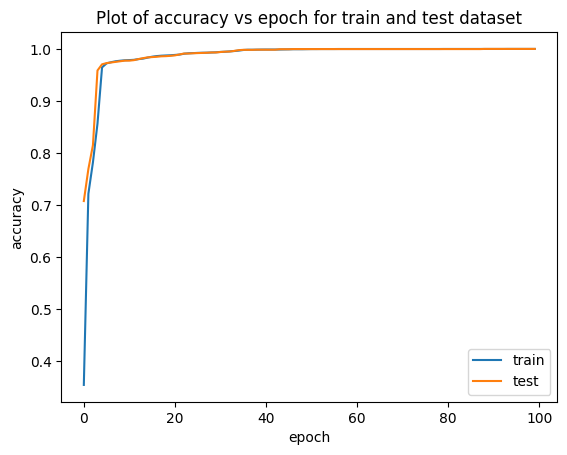

In [146]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

In [147]:
from sklearn.metrics import roc_curve, auc as roc_auc_score
import matplotlib.pyplot as plt
y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(fpr, tpr)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


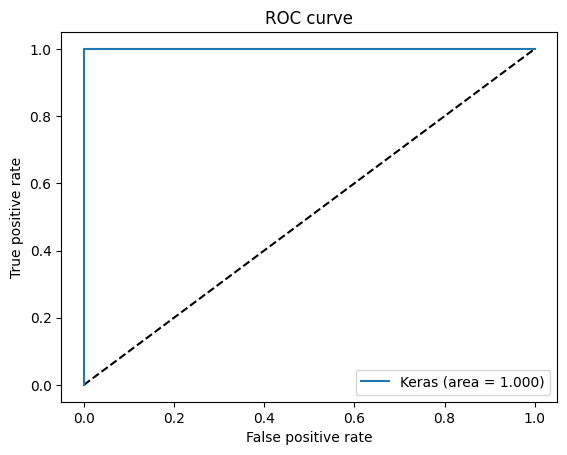

In [148]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

plt.show()

In [149]:
pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [150]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9995869475423379
F1 Score -  0.999793431109275
Precision Score -  1.0
